# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane 1
* automobile 2
* bird 3
* cat 4
* deer 5
* dog 6
* frog 7
* horse 8
* ship 9
* truck 10

* Total 10 classes (Aras changed above/this section a bit)

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


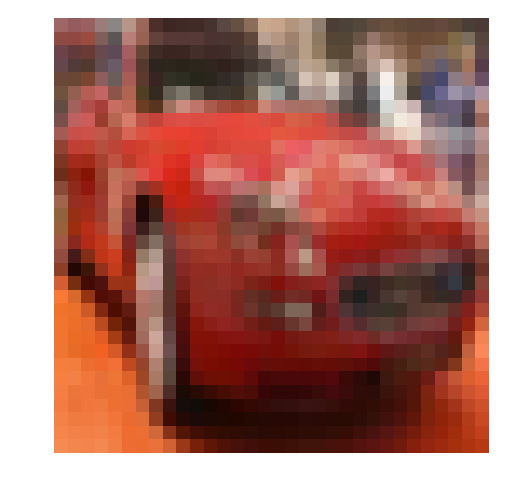

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    ## image data shape = [t, i,j,k], t= num_img_per_batch (basically the list of images), i,j,k=height,width, and depth/channel
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
# import helper ## I did this because sklearn.preprocessing was defined in there
from sklearn import preprocessing  ## from sklearn lib import preprocessing lib/sublib/functionality/class

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function

    ## This was in the helper.py which belongs to the generic helper functions
    #     def display_image_predictions(features, labels, predictions):
    #     n_classes = 10
    #     label_names = _load_label_names()
    #     label_binarizer = LabelBinarizer()
    #     label_binarizer.fit(range(n_classes))
    #     label_ids = label_binarizer.inverse_transform(np.array(labels))
    label_binarizer = preprocessing.LabelBinarizer() ## instantiate and initialized the one-hot encoder from class to one-hot
    n_class = 10 ## total num_classes
    label_binarizer.fit(range(n_class)) ## fit the one-vec to the range of number of classes, 10 in this case (dataset)
    return label_binarizer.transform(x) ## transform the class labels to one-hot vec


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

If you're finding it hard to dedicate enough time for this course a week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) to build each layer, except "Convolutional & Max Pooling" layer.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

If you would like to get the most of this course, try to solve all the problems without TF Layers.  Let's begin!
### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [58]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    ## name the placeholder?? why should I do that? I can return it directly like below
    ## It is also worth mentioning that the overal image_shape = [i,j,k] meaning row, col, channels/depth or 
    ## i, j, k
    ## h, w, depth (deep-wide learning)
    ## r, c, channels
    ## y, x, z
    ## Data_structure AKA data_shape are usually defined dshape = [i, j, k] as a tensor/Mat/Vec or even a scalar
    ## This is kind of tricky: image_shape is probablly pointing at the img_hight, img_width, and image_depth as well
    ## x_tensor is probably the input image or images or input batch
    return tf.placeholder(dtype=tf.float32, 
                          shape=[None, image_shape[0], image_shape[1], image_shape[2]], 
                          name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    ## tf.placehoolder(data_type, data_structure (data_shape))
    return tf.placeholder(dtype=tf.int32, shape=[None, n_classes], name='y') ## the t/batch_size/num_img_per_batch = None & n/num_dimension = n_classes


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    ## Basically the main command should be like tf.placeholder(tf.float32, [None, 1]) since it is a scalar but I can also use a variable for it as well.
    return tf.placeholder(dtype=tf.float32, shape=None, name='keep_prob') ## this is basically a scalar but it is data_type/dtype is not INT but float since it is a probability value 0-1 (is it really??).


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

Note: You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.  You're free to use any TensorFlow package for all the other layers.

In [59]:
# This is the new function for implementing the backprop in convnets.
def conv2d_relu(x_tensor, conv_num_outputs, conv_ksize, conv_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    k = x_tensor.get_shape()[3:4].num_elements() ## there shoudl be a simpler way!! num_elements/length
    w_shape = [conv_ksize[0], conv_ksize[1], k, conv_num_outputs] # conv_num_output 1D tuple or a scalar
    w = tf.Variable(tf.truncated_normal(shape=w_shape, mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
    strides = [1, conv_strides[0], conv_strides[1], 1] # t == batch/num_data-img-images, i=hight/row/y, j=width/x/col, k=depth is usually 1
    h_tensor_in = tf.nn.conv2d(input=x_tensor, filter=w, strides=strides, padding='VALID', use_cudnn_on_gpu=None,
                              data_format=None, name=None) ## apply convolution, None==Dynamic and NOT static memory

    ## Let's create biases
    b = tf.Variable(tf.truncated_normal(shape=[conv_num_outputs], mean=0.0, stddev=0.1, dtype=tf.float32, 
                                        seed=None, name=None)) # b_1xh
    h_tensor_in += b
    
    ## adding relu function/activate function and the output is the h_tensor hidden layer output
    h_tensor_out = tf.nn.relu(h_tensor_in) ## apply non-linearity, i.e. ReLU function
    return h_tensor_out

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

In [60]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # x_tensor shape = [batch, img_w, img_height, img_depth] = [t, n] = mat_txn, t==batch, n=hxwxd
    # img_flat = img_w * img_h * img_d
    n_size = x_tensor.get_shape()[1:4].num_elements() #1,2,3
    return tf.reshape(x_tensor, [-1, n_size])

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

Note: Activation, softmax, or cross entropy shouldn't be applied to this.

In [61]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    ## The only differemce between this layer and the previous fully connected layer is the softmax for classification.
    ## Instead of ReLU, softmax should be used.
    n_size = x_tensor.get_shape()[1:2].num_elements() ## to get the num_features
    ## Let's assign w and b for wx+b
    w = tf.Variable(tf.truncated_normal(shape=[n_size, num_outputs], mean=0.0, stddev=0.1, 
                                        dtype=tf.float32, seed=None, name=None))
    b = tf.Variable(tf.truncated_normal(shape=[num_outputs], mean=0.0, stddev=0.1, 
                                        dtype=tf.float32, seed=None, name=None))

    return tf.matmul(x_tensor, w) + b
    #return tf.nn.softmax(y_tensor_in) ## this should NOT be applied because in error with cross entropy softmax will be applied.
    ## That is why only logits wx+b is needed for this layer.


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [73]:
def conv_net(x):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers

    # The convolutional layers
    h_tensor = conv2d_relu(x_tensor=x, conv_num_outputs=10, conv_ksize=[3, 3], conv_strides=[1, 1])

    # TODO: Apply a Flatten Layer for FC/ Full Connections
    # TODO: Apply an Output Layer
    # TODO: return output
    h_tensor_flattened = flatten(x_tensor=h_tensor)
    return output(x_tensor=h_tensor_flattened, num_outputs=10)

In [74]:
##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)

# Model
logits = conv_net(x=x)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost) # TODO for backprop

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

# # In this section, I try to implement backprop using SGD as an optimizer for minimizing the cost and training the convnet.
# # Given the cost, activation function derivative should be calculated.
# # delta_layer, delta_weights, delta_biases==delta_layer, db, delta, dl, dw, delta==dl=db
# # db = cost * activation_function_derivative_1st

# ## FC layer
# # dw = db dot_product/inner_product/cos_product_matmul h_out
# # dw = tf.matmul(dw, h_out) # dw_hxm=tf.matmul(db_1xm, hout_1xk) 
# dw_hxm=tf.matmul(hout_1xh.T, db_1xm) ## FC layer== FFNet/MLP

# # dw = conv2d(h_out.T, db, kernel_size, stride, padding)

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [72]:
def train_neural_network(session, optimizer, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function

    # Feed the dictionary (x, y, dropout_prob) from Numpy (Python) into TensorFlow (Tensors)
    feed_dict_train = {x:feature_batch, y:label_batch}

    # Run the optimizer on the fed training dict (TF training data).
    session.run(optimizer, feed_dict=feed_dict_train)
    
    pass

### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [75]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    ## Placeholders for input/feature and output/labels    
    feed_dict_train = {x:feature_batch, y:label_batch}
    cost_train = session.run(cost, feed_dict=feed_dict_train)
    accuracy_train = session.run(accuracy, feed_dict=feed_dict_train)
    print("trainging cost:", cost_train, "accuracy:", accuracy_train)

    ## Using the placeholders declared globally before and at the top
    feed_dict_valid = {x:valid_features, y:valid_labels}
    cost_valid = session.run(cost, feed_dict=feed_dict_valid)
    accuracy_valid = session.run(accuracy, feed_dict=feed_dict_valid)
    print("validation cost:", cost_valid, "accuracy:", accuracy_valid)
    
    
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [76]:
# TODO: Tune Parameters
epochs = 10 #None
batch_size = 64 # recommanded memory

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [77]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  trainging cost: 2.12184 accuracy: 0.3
validation cost: 1.86195 accuracy: 0.3418
Epoch  2, CIFAR-10 Batch 1:  trainging cost: 1.97018 accuracy: 0.425
validation cost: 1.71773 accuracy: 0.394
Epoch  3, CIFAR-10 Batch 1:  trainging cost: 1.82397 accuracy: 0.425
validation cost: 1.63325 accuracy: 0.4266
Epoch  4, CIFAR-10 Batch 1:  trainging cost: 1.69384 accuracy: 0.475
validation cost: 1.56943 accuracy: 0.4506
Epoch  5, CIFAR-10 Batch 1:  trainging cost: 1.57523 accuracy: 0.45
validation cost: 1.52542 accuracy: 0.467
Epoch  6, CIFAR-10 Batch 1:  trainging cost: 1.46968 accuracy: 0.525
validation cost: 1.50183 accuracy: 0.4748
Epoch  7, CIFAR-10 Batch 1:  trainging cost: 1.38066 accuracy: 0.525
validation cost: 1.49164 accuracy: 0.4818
Epoch  8, CIFAR-10 Batch 1:  trainging cost: 1.30952 accuracy: 0.575
validation cost: 1.48932 accuracy: 0.4892
Epoch  9, CIFAR-10 Batch 1:  trainging cost: 1.24666 accuracy: 0.6
validat

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [78]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches, i.e. 5 batches total
        n_batches = 2
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  trainging cost: 2.03234 accuracy: 0.35
validation cost: 1.83912 accuracy: 0.351
Epoch  1, CIFAR-10 Batch 2:  trainging cost: 1.78771 accuracy: 0.4
validation cost: 1.69244 accuracy: 0.4142
Epoch  2, CIFAR-10 Batch 1:  trainging cost: 1.8115 accuracy: 0.45
validation cost: 1.627 accuracy: 0.4224
Epoch  2, CIFAR-10 Batch 2:  trainging cost: 1.58314 accuracy: 0.475
validation cost: 1.54538 accuracy: 0.458
Epoch  3, CIFAR-10 Batch 1:  trainging cost: 1.67113 accuracy: 0.475
validation cost: 1.51834 accuracy: 0.4624
Epoch  3, CIFAR-10 Batch 2:  trainging cost: 1.46987 accuracy: 0.55
validation cost: 1.46945 accuracy: 0.4812
Epoch  4, CIFAR-10 Batch 1:  trainging cost: 1.60056 accuracy: 0.525
validation cost: 1.45064 accuracy: 0.4852
Epoch  4, CIFAR-10 Batch 2:  trainging cost: 1.36839 accuracy: 0.6
validation cost: 1.43143 accuracy: 0.4914
Epoch  5, CIFAR-10 Batch 1:  trainging cost: 1.55715 accuracy: 0.525
validation cost: 1.40973 accuracy: 0.4954
E

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.5108479299363057



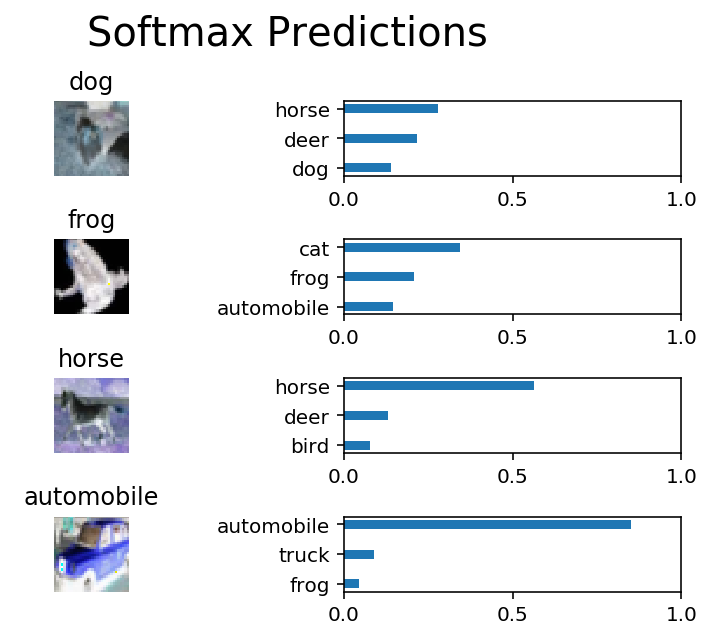

In [79]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.